# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

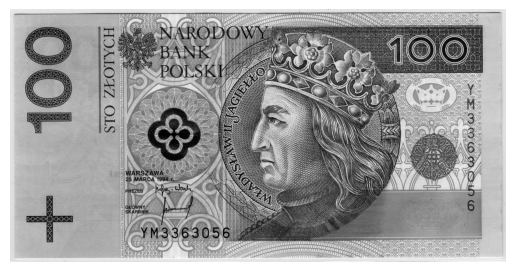

In [2]:
image = cv2.imread(fileName)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.gray()
plt.axis('off')
plt.imshow(image)

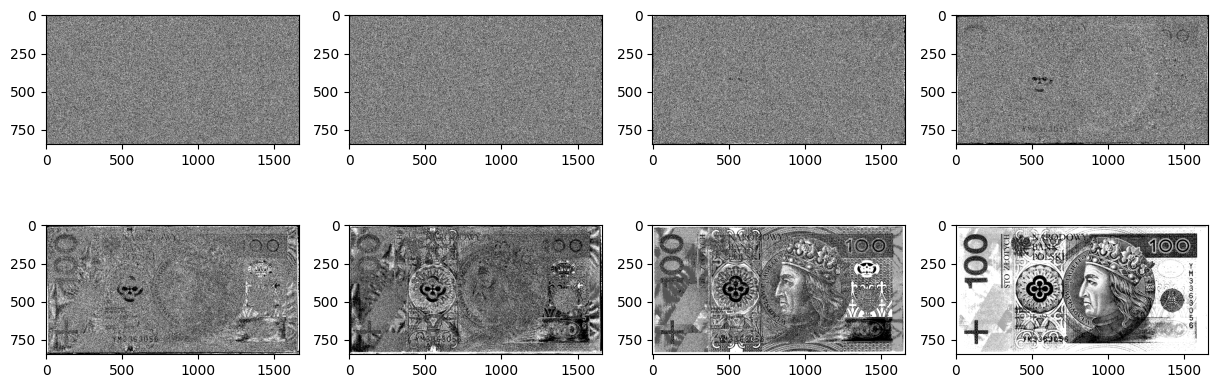

In [3]:
_, axs = plt.subplots(2, 4, figsize=(15,5))

for index in range(8):
    # First method:
    # newImage = (image >> index) & 1
    # axs[index // 4][index % 4].imshow(newImage)

    # Second method:
    shift = 1 << index 
    axs[index // 4][index % 4].imshow(cv2.bitwise_and(image, shift))
#end 'for' loop 

In [4]:
import numpy as np

# np. whichBits = [7, 2, 1] - bierzmy 7, 2 i 1 bit. 
# whichBits in descending order 

def showImageBits(ax, image, whichBits):
    #
    result = np.zeros((len(image), len(image[0])), dtype=np.uint8)
    # shift = len(whichBits) - 1 

    for bit in whichBits:
        result += ((image >> bit) & 1 ) << bit
        # shift -= 1
    #
    
    ax.imshow(result)
    ax.set_title(f"Used {whichBits} bits")
#end procedure ShowImageBits()

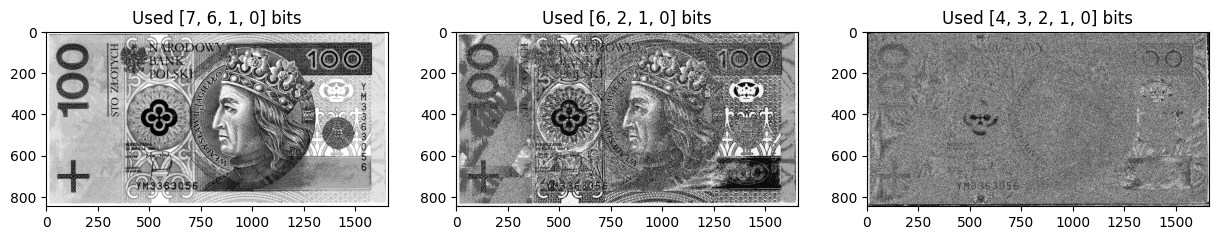

In [5]:
_, axs = plt.subplots(1, 3, figsize=(15,5))
plt.gray()
showImageBits(axs[0], image, [7, 6, 1, 0])
showImageBits(axs[1], image, [6, 2, 1, 0])
showImageBits(axs[2], image, [4, 3, 2, 1, 0])